<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

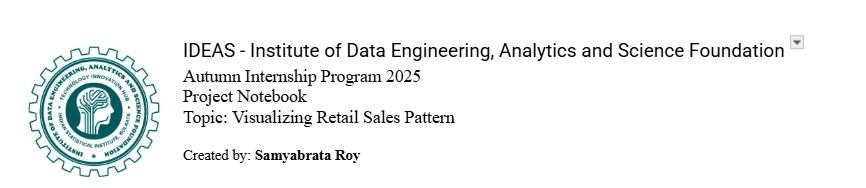

# Notebook: 2
# Assisgnment : Visualizing Time Series Dataset Retail Sales Data

# 📖 Introduction

Every time we walk into a pharmacy or even shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and sometimes even how often we return. At first, this information looks like nothing more than a set of numbers in a spread sheet: dates, medicine names, and amounts. But when we start to analyse and visualize this data, hidden patterns begin to appear.
We can see which medicines are sold the most during certain months, how customer buying behaviour changes over time, and which products bring in the most revenue. Suddenly, pharmacy sales data isn’t just a list of transactions — it becomes a story about customers, business growth, and the choices people make every day.
That’s the true value of visualization. It doesn’t just create colourful graphs, it helps to reveal trends, highlight problems, and show opportunities that might otherwise go unnoticed. Managers can use these insights to plan stock and marketing, and students like me can use them to practice data analysis and understand business patterns better.
In this project, I worked with a pharmacy dataset and used Python to explore and visualize it. Some of the tasks included cleaning the dataset, grouping sales by month, and calculating revenue growth. I also created visualizations to show monthly trends, cumulative growth, and top-selling medicines. By the end, this project helped me understand how simple sales records can be transformed into meaningful insights through analysis and visualization.





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
  = Time-series data is information that is collected and recorded at different points in time, usually in a sequence. For example, daily sales in a shop or monthly revenue records form a time-series dataset.

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
= Yes, choosing Python is a very good decision for this kind of project because,
Pandas makes it easy to handle tabular datasets (like CSV sales data).Matplotlib help create clear and attractive visualizations for trends.Python is widely used in data science, machine learning, and business analytics, so skills in it are valuable.It is open-source, has strong community support, and can handle both small and large datasets.
  

---

---

## 📂 Loading Our Dataset
Now that our setup is ready, it’s time to bring in the dataset we’ll be working with.
In the next coding cell, we’ll load the Pharmacy Sales dataset directly from our storage (CSV file).

Once the file is loaded, we’ll print the first few rows of the dataset so that we can quickly review the structure and understand what kind of information it contains (such as Patient ID, Date, Medicine Name, Quantity, Price per Unit, Doctor Name, and Total Amount) before moving into cleaning, analysis, and visualization.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your Google Drive file ID which has public view access
file_id = "1ns8ESrlEfck9QiaJiY4KnbKSlIQCld8b" # Corrected file ID

# Construct the download URL for direct download
url = f"https://drive.google.com/uc?export=download&id={file_id}"
try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

  Patient_ID        Date           Medicine_Name  Quantity  Price_per_unit  \
0      P0001  24-01-2024  Eye Drops (Antibiotic)         4         1124.98   
1      P0002  20-06-2024       Pantoprazole 40mg         5          844.02   
2      P0003  30-03-2024         Ibuprofen 400mg         3         1200.33   
3      P0004  13-01-2025        Clopidogrel 75mg         5         1244.47   
4      P0005  07-03-2025         Prednisone 10mg         5         1555.87   

          Doctor_Name   Amount  
0          Dr. T. Sen  4499.92  
1     Dr. S. Banerjee  4220.10  
2    Dr. A. Mukherjee  3600.99  
3     Dr. S. Banerjee  6222.35  
4  Dr. M. Chakraborty  7779.35  




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

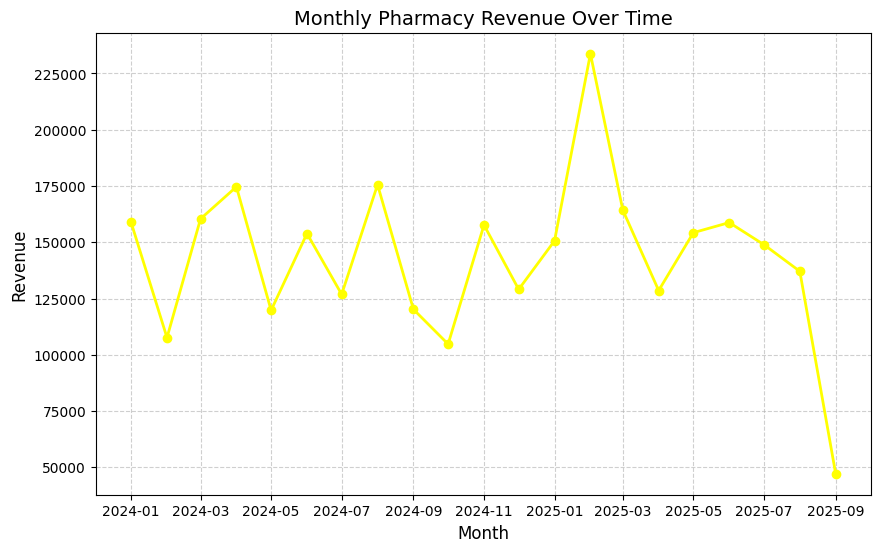

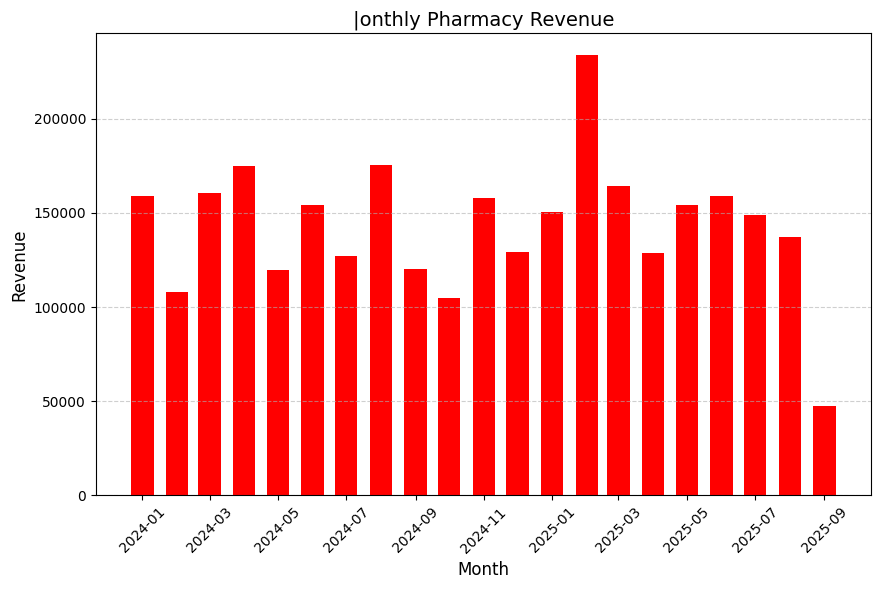

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format="%d-%m-%Y")


# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values,color = 'yellow', marker='o', linewidth=2)
plt.title("Monthly Pharmacy Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# onthly Pharmacy Revenue
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values,color='red', width=20)  # width=20 for month spacing
plt.title("|onthly Pharmacy Revenue", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()





**Q. Can you interpret the above bar diagram?**
The bar diagram shows the monthly revenue of the pharmacy. I can see that some months have much higher sales compared to others, which means revenue is not the same every month.

**Q. What are your key takeaways?**
My key takeaway is that the business does not earn equally every month — some months are strong while others are weaker. This tells me that sales might depend on seasonal demand or the types of medicines prescribed in those months.

---




---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?
     
= The weekly revenue chart shows more fluctuations because sales change a lot from one week to another. The monthly chart looks smoother, as it combines several weeks together and hides the small ups and downs.


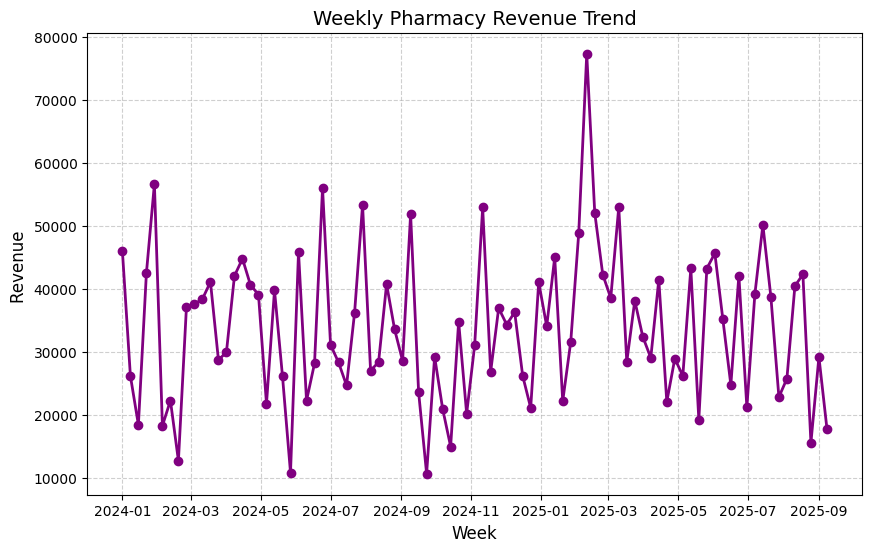

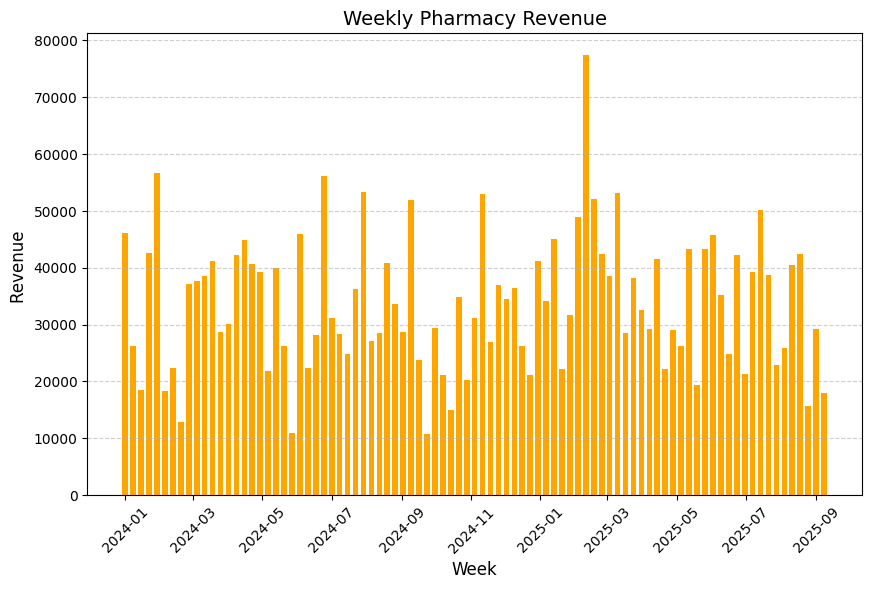

In [38]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format="%d-%m-%Y")

# Weekly Revenue Calculation
weekly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# ---- Line Chart (Weekly Revenue) ----
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, color='purple', marker='o', linewidth=2)
plt.title("Weekly Pharmacy Revenue Trend", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue ", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart (Weekly Revenue) ----
plt.figure(figsize=(10,6))
plt.bar(weekly_revenue.index, weekly_revenue.values, color='orange', width=5)  # width adjusted for weeks
plt.title("Weekly Pharmacy Revenue", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue ", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

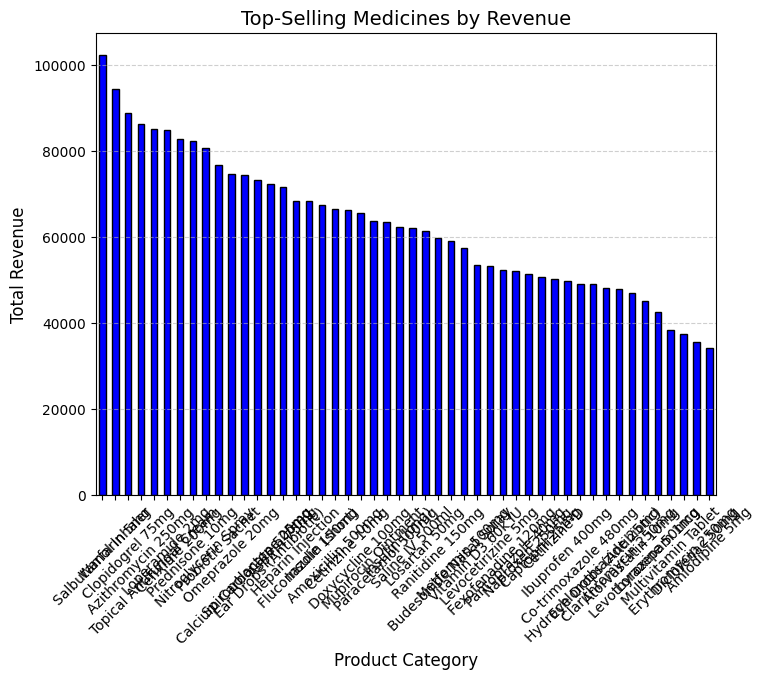

In [ ]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Medicine_Name')['Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='blue', edgecolor='black')

plt.title("Top-Selling Medicines by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?


=From the bar chart, it is clear that Salbutamol Inhaler has generated the highest revenue compared to all other medicines. This means it is the most sold product and contributes the largest share to the pharmacy’s income.



---


###❓ Question:  
What if we want to visualize the **top 5 Doctors** by total spending?  
Try writing the code to generate a bar chart!  

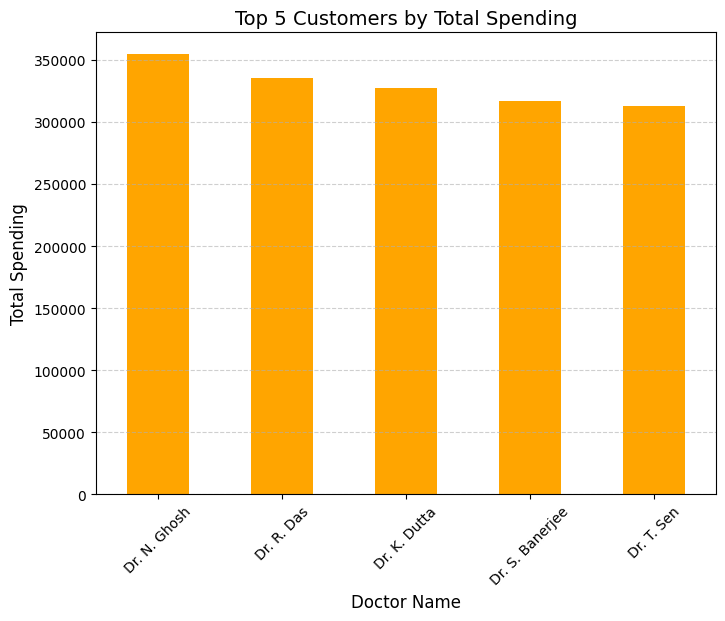

In [39]:
# Group by Customer and sum the Amount
top_customers = df_sales.groupby("Doctor_Name")["Amount"].sum().sort_values(ascending=False).head(5)

# ---- Bar Chart ----
plt.figure(figsize=(8,6))
top_customers.plot(kind="bar", color="orange")
plt.title("Top 5 Customers by Total Spending", fontsize=14)
plt.xlabel("Doctor Name", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Calculate the average order value (AOV) per Doctor and plot them with a suitable diagram. Which doctors have unusually high AOVs?

/tmp/ipython-input-1068940010.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_per_doctor = df_sales.groupby("Doctor_Name").apply(


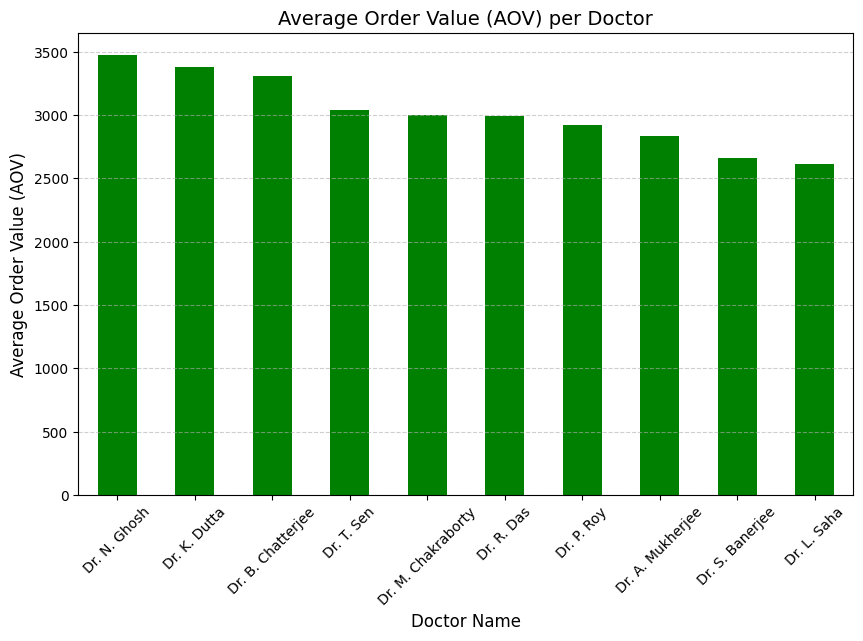

In [ ]:
# Calculate AOV per doctor
aov_per_doctor = df_sales.groupby("Doctor_Name").apply(
    lambda x: x["Amount"].sum() / len(x)
).sort_values(ascending=False)

# ---- Plot ----
plt.figure(figsize=(10,6))
aov_per_doctor.plot(kind="bar", color="green")
plt.title("Average Order Value (AOV) per Doctor", fontsize=14)
plt.xlabel("Doctor Name", fontsize=12)
plt.ylabel("Average Order Value (AOV)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

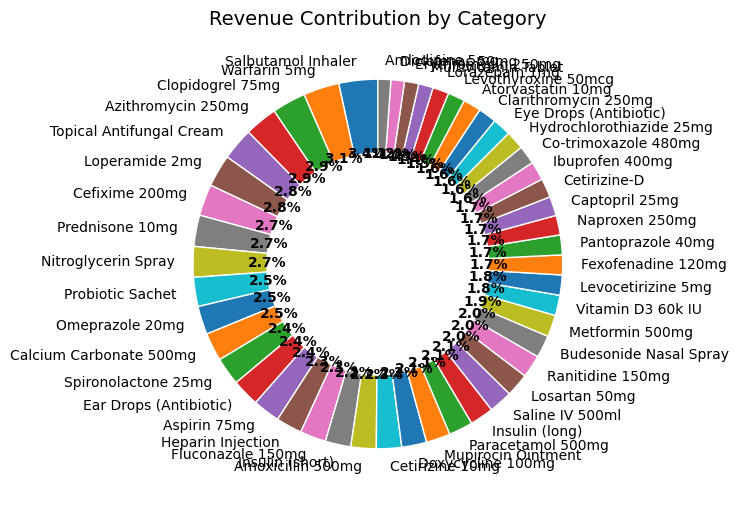

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

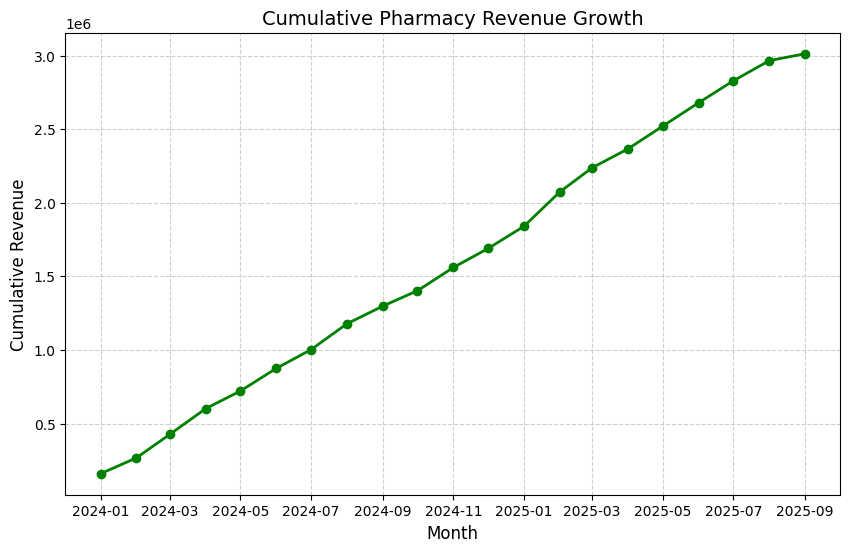

In [ ]:
# ---- Cumulative Revenue Line Chart ----
cumulative_revenue = monthly_revenue.cumsum()

plt.figure(figsize=(10,6))
plt.plot(cumulative_revenue.index, cumulative_revenue.values, color='green', marker='o', linewidth=2)

plt.title("Cumulative Pharmacy Revenue Growth", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()